In [41]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [17]:
df = pd.read_feather('data/oahu.feather', nthreads=16)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:1: FutureWarning: the 'nthreads' keyword is deprecated, use 'use_threads' instead
  if __name__ == '__main__':


In [42]:
info = pd.read_csv('data/info.csv')

In [98]:
df.head()

,Date,Seconds,Year,DOY,HST,GH_DH3,GH_DH4,GH_DH5,GH_DH10,GH_DH11,...,GT_AP6,GH_AP1,GH_AP3,GH_AP5,GH_AP4,GH_AP7,GH_DH6,GH_DH7,GH_DH8,Datetime
0,20100318,0,2010,77,500,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,...,0.0,0.0,0.0,0.0,-0.358605,0.0,-99999.0,-99999.0,-99999.0,2010-03-18 05:00:00
1,20100318,1,2010,77,500,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,...,0.0,0.0,0.0,0.0,-0.358605,0.0,-99999.0,-99999.0,-99999.0,2010-03-18 05:00:01
2,20100318,2,2010,77,500,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,-99999.0,-99999.0,-99999.0,2010-03-18 05:00:02
3,20100318,3,2010,77,500,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,...,0.0,0.0,0.0,0.0,-0.358605,0.0,-99999.0,-99999.0,-99999.0,2010-03-18 05:00:03
4,20100318,4,2010,77,500,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,-99999.0,-99999.0,-99999.0,2010-03-18 05:00:04


In [44]:
info

,Location,Pakbus,Latitude,Longitude,Sensor,CF
0,DHHL_3,201,21.31236,-158.08463,PY66499,141.76
1,DHHL_4,202,21.31303,-158.08505,PY66500,118.01
2,DHHL_5,203,21.31357,-158.08424,PY66501,104.46
3,DHHL_10,204,21.31183,-158.08554,PY66502,109.06
4,DHHL_11,205,21.31042,-158.08530,PY66503,114.71
5,DHHL_9,206,21.31268,-158.08688,PY66504,141.92
6,DHHL_2,207,21.31451,-158.08534,PY66505,106.39
7,DHHL_1,208,21.31533,-158.08700,PY66519,107.34
8,AP_6,209,21.30812,-158.07935,PY66521,117.34
9,AP_1,210,21.31276,-158.08389,PY66523,110.40


In [8]:
df.describe()

,Seconds,Year,DOY,HST,GH_DH3,GH_DH4,GH_DH5,GH_DH10,GH_DH11,GH_DH9,...,GH_AP6,GT_AP6,GH_AP1,GH_AP3,GH_AP5,GH_AP4,GH_AP7,GH_DH6,GH_DH7,GH_DH8
count,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,...,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07,3.202259e+07
mean,2.949945e+01,2.010513e+03,1.858836e+02,1.229514e+03,2.078589e+02,2.012375e+02,2.051705e+02,2.055484e+02,2.022586e+02,2.059909e+02,...,3.763285e+02,3.090993e+02,3.137456e+02,-3.127578e+04,3.744299e+02,3.707667e+02,2.693240e+02,2.058194e+02,2.072241e+02,2.020341e+02
std,1.731841e+01,4.998400e-01,9.226219e+01,4.324050e+02,4.134423e+03,4.133063e+03,4.133597e+03,4.133466e+03,4.133159e+03,4.134343e+03,...,3.559355e+02,3.367872e+02,2.395721e+03,4.663147e+04,3.551335e+02,3.487763e+02,3.287228e+03,4.133613e+03,4.133807e+03,4.133188e+03
min,0.000000e+00,2.010000e+03,1.000000e+00,5.000000e+02,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04,...,-3.903160e-01,-3.641710e-01,-9.999900e+04,-9.999900e+04,0.000000e+00,-3.587210e-01,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04
25%,1.400000e+01,2.010000e+03,1.130000e+02,8.450000e+02,3.585280e+01,3.926890e+01,3.919680e+01,4.040690e+01,3.781860e+01,3.493940e+01,...,4.057890e+01,3.422060e+01,4.073970e+01,-9.999900e+04,4.054130e+01,4.087510e+01,3.739830e+01,3.879600e+01,3.974750e+01,3.918830e+01
50%,2.900000e+01,2.011000e+03,1.870000e+02,1.230000e+03,2.745670e+02,2.766120e+02,2.786700e+02,2.815790e+02,2.783340e+02,2.710140e+02,...,2.825530e+02,1.752650e+02,2.790020e+02,4.755150e+01,2.798900e+02,2.805950e+02,2.796300e+02,2.802770e+02,2.804950e+02,2.769610e+02
75%,4.400000e+01,2.011000e+03,2.610000e+02,1.615000e+03,6.352530e+02,6.240600e+02,6.310440e+02,6.315050e+02,6.254170e+02,6.332350e+02,...,6.343040e+02,5.117000e+02,6.234180e+02,4.261850e+02,6.300870e+02,6.254420e+02,6.341130e+02,6.326570e+02,6.349530e+02,6.250400e+02
max,5.900000e+01,2.011000e+03,3.650000e+02,2.000000e+03,1.776870e+03,1.700350e+03,1.679110e+03,1.683540e+03,1.671920e+03,1.774320e+03,...,1.688870e+03,1.599200e+03,1.637120e+03,1.729710e+03,1.684510e+03,1.673730e+03,1.743300e+03,1.695660e+03,1.695750e+03,1.689960e+03


In [9]:
df.shape

(32022593, 25)

In [54]:
sensors = ['GH_DH3', 'GH_DH4', 'GH_DH5',
       'GH_DH10', 'GH_DH11', 'GH_DH9', 'GH_DH2', 'GH_DH1', 'GT_DH1', 'GH_AP6',
       'GT_AP6', 'GH_AP1', 'GH_AP3', 'GH_AP5', 'GH_AP4', 'GH_AP7', 'GH_DH6',
       'GH_DH7', 'GH_DH8']

#df[df[sensors] < 0]

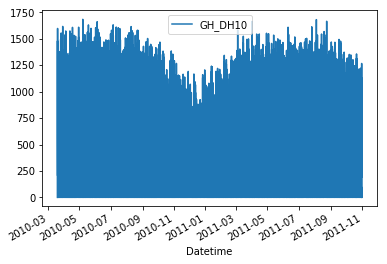

In [10]:
df[df["GH_DH10"]>0].plot(x='Datetime', y='GH_DH10')

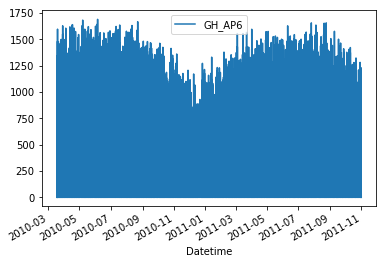

In [11]:
df[df["GH_AP6"]>0].plot(x='Datetime', y='GH_AP6')

In [10]:
df_ = df.replace(-99999.000000, np.nan)

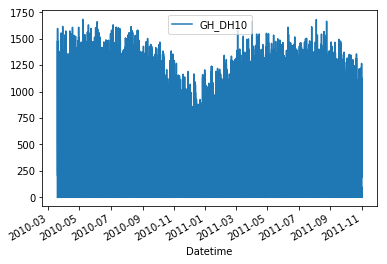

In [13]:
df_.plot(x='Datetime', y='GH_DH10')

In [14]:
dfs = df_.iloc[:10000]

In [18]:
import seaborn as sns

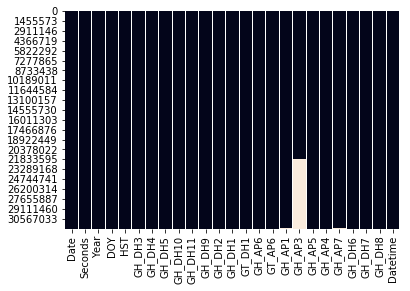

In [27]:
sns.heatmap(df_.isnull(), cbar=False)

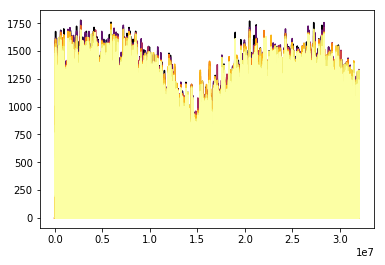

In [28]:
df_[sensors].plot(legend=False, colormap='inferno')

In [101]:
df.Datetime[df.Date == "20100318"].shape

(54001,)

In [110]:
df.Datetime

0          2010-03-18 05:00:00
1          2010-03-18 05:00:01
2          2010-03-18 05:00:02
3          2010-03-18 05:00:03
4          2010-03-18 05:00:04
5          2010-03-18 05:00:05
6          2010-03-18 05:00:06
7          2010-03-18 05:00:07
8          2010-03-18 05:00:08
9          2010-03-18 05:00:09
10         2010-03-18 05:00:10
11         2010-03-18 05:00:11
12         2010-03-18 05:00:12
13         2010-03-18 05:00:13
14         2010-03-18 05:00:14
15         2010-03-18 05:00:15
16         2010-03-18 05:00:16
17         2010-03-18 05:00:17
18         2010-03-18 05:00:18
19         2010-03-18 05:00:19
20         2010-03-18 05:00:20
21         2010-03-18 05:00:21
22         2010-03-18 05:00:22
23         2010-03-18 05:00:23
24         2010-03-18 05:00:24
25         2010-03-18 05:00:25
26         2010-03-18 05:00:26
27         2010-03-18 05:00:27
28         2010-03-18 05:00:28
29         2010-03-18 05:00:29
                   ...        
32022563   2011-10-31 19:59:31
32022564

## Minute Data

In [112]:
df_min = df[df.Datetime.dt.second == 0]
df_min_ = df_min.replace(-99999.000000, np.nan)
df_min_.to_csv("data/minutely.csv", index = False)

In [195]:
df_min_.Datetime.shape

(534293,)

## Hour Data

In [49]:
df_hour = df_min[df_min.Datetime.dt.minute == 0]
df_hour_ = df_hour.replace(-99999.000000, np.nan)
df_hour_.to_csv("data/hourly.csv", index = False)

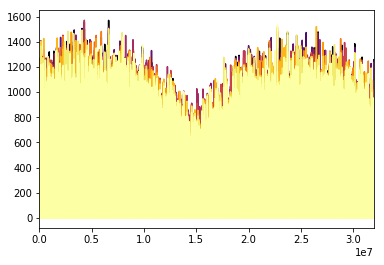

In [55]:
df_hour_[sensors].plot(legend=False, colormap='inferno')

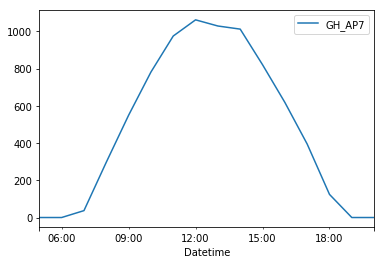

In [174]:
df_hour_[(df_hour_.Date == "20100327")].plot(x='Datetime', y='GH_AP7')

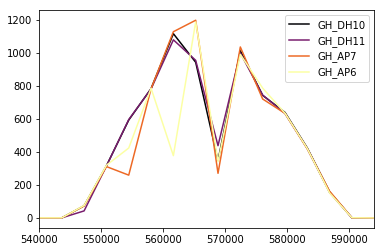

In [186]:
sensors = ['GH_DH10', 'GH_DH11', 'GH_AP7', 'GH_AP6']
df_hour_[(df_hour_.Datetime.dt.day == 28) & (df_hour_.Datetime.dt.month == 3) & (df_hour_.Datetime.dt.year == 2010)][sensors].plot(colormap='inferno')

In [194]:
df_[(df_.Datetime.dt.hour ==20) & (df_.Datetime.dt.minute == 0)]

,Date,Seconds,Year,DOY,HST,GH_DH3,GH_DH4,GH_DH5,GH_DH10,GH_DH11,...,GT_AP6,GH_AP1,GH_AP3,GH_AP5,GH_AP4,GH_AP7,GH_DH6,GH_DH7,GH_DH8,Datetime
54000,20100318,0,2010,77,2000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.0,-0.35860,0.0,NaN,NaN,NaN,2010-03-18 20:00:00
108001,20100319,0,2010,78,2000,0.000000,-0.392754,-0.349883,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-19 20:00:00
162002,20100320,0,2010,79,2000,0.000000,0.000000,-0.349791,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-20 20:00:00
216003,20100321,0,2010,80,2000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-21 20:00:00
270004,20100322,0,2010,81,2000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-22 20:00:00
324005,20100323,0,2010,82,2000,0.000000,0.000000,-0.349695,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-23 20:00:00
378006,20100324,0,2010,83,2000,0.000000,0.000000,-0.349713,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-24 20:00:00
432007,20100325,0,2010,84,2000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-25 20:00:00
486008,20100326,0,2010,85,2000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-26 20:00:00
540009,20100327,0,2010,86,2000,0.000000,0.000000,-0.349783,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,2010-03-27 20:00:00


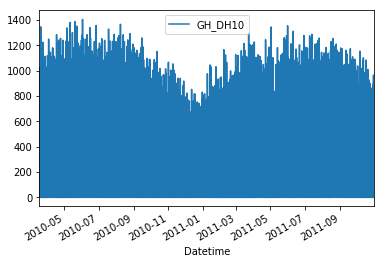

In [56]:
df_hour_[df_hour_.Datetime.dt].plot(x='Datetime', y='GH_DH10')

## Daily

In [120]:
df_day = df_hour[df_hour.Datetime.dt.hour == 6] 

In [121]:
df_day_ = df_day.replace(-99999.000000, np.nan)

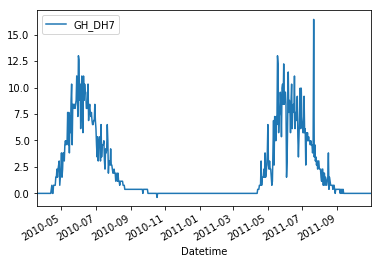

In [122]:
df_day_.plot(x='Datetime', y='GH_DH7')

In [80]:
df_day_.shape

(593, 25)